In [1]:
# Create the Kaggle directory (ensure correct path)
!mkdir -p ~/.kaggle

# Copy the Kaggle API token file to the correct location
#now go and visit kaggle->profile->settings->account ->scroll down you will see create API
#download that file and upload it to this notebook and then run this
#IMPORTANT READ ABOVE

!cp kaggle.json ~/.kaggle/


The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:27<00:00, 47.0MB/s]
100% 1.06G/1.06G [00:27<00:00, 42.1MB/s]


In [3]:
import zipfile

# Open the zip file
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip", 'r')

# Extract all contents to the specified directory
zip_ref.extractall("/content")

# Close the zip file
zip_ref.close()


In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *


In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define training dataset
train_ds = image_dataset_from_directory(
    directory="/content/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)
class_names = train_ds.class_names
print("Class Names:", class_names)
# Define validation dataset
validation_ds = image_dataset_from_directory(
    directory="/content/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

print("Datasets loaded successfully!")


Found 20000 files belonging to 2 classes.
Class Names: ['cats', 'dogs']
Found 5000 files belonging to 2 classes.
Datasets loaded successfully!


In [6]:
import tensorflow as tf

# Function to normalize images
def process(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values
    return image, label

# Apply the function to datasets
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

print("Datasets normalized successfully!")


Datasets normalized successfully!


In [13]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, kernel_size=(3, 3), padding="valid", activation="relu", input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))

# Second Convolutional Layer
model.add(Conv2D(64, kernel_size=(3, 3), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))

# Third Convolutional Layer
model.add(Conv2D(128, kernel_size=(3, 3), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation="sigmoid"))  # Binary classification output

# Display model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [14]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [15]:
# Train the model
history = model.fit(train_ds, validation_data=validation_ds, epochs=10)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 84ms/step - accuracy: 0.5636 - loss: 2.5074 - val_accuracy: 0.6412 - val_loss: 0.6293
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 78ms/step - accuracy: 0.6579 - loss: 0.6141 - val_accuracy: 0.6224 - val_loss: 0.6254
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 82ms/step - accuracy: 0.7251 - loss: 0.5398 - val_accuracy: 0.7510 - val_loss: 0.5295
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.7707 - loss: 0.4765 - val_accuracy: 0.7744 - val_loss: 0.4826
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.8112 - loss: 0.4184 - val_accuracy: 0.6940 - val_loss: 0.6250
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.8443 - loss: 0.3566 - val_accuracy: 0.8160 - val_loss: 0.4227
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 80ms/step - accuracy: 0.8854 - loss: 0.2714 - val_accuracy: 0.7266 - val_loss: 0.6702
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.9188 - loss: 0.1988 - 

In [17]:
# Get the final accuracy
train_acc = history.history["accuracy"][-1]
val_acc = history.history["val_accuracy"][-1]

# Print accuracy scores
print(f"Final Training Accuracy: {train_acc:.4f}")
print(f"Final Validation Accuracy: {val_acc:.4f}")

Final Training Accuracy: 0.9639
Final Validation Accuracy: 0.7710


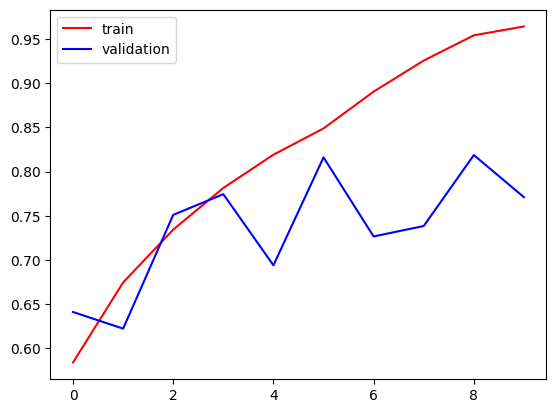

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')

plt.legend()
plt.show()


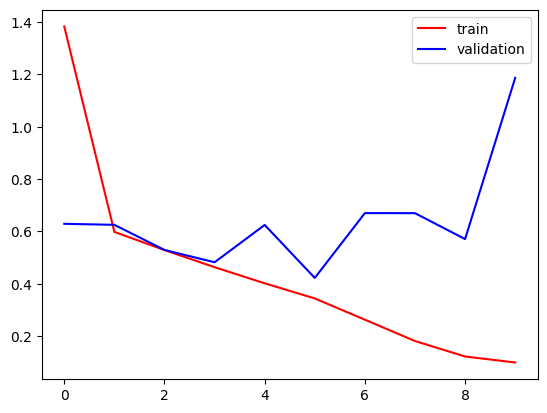

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')

plt.legend()
plt.show()


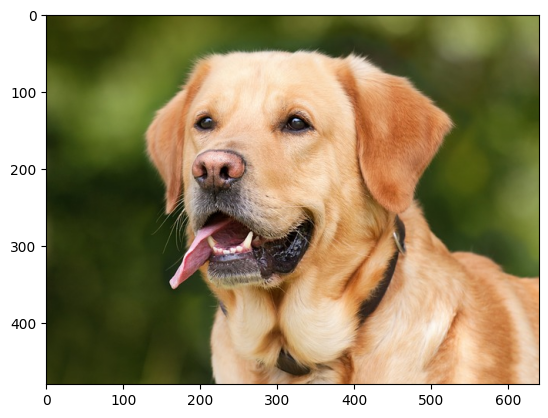

In [32]:
import cv2
import matplotlib.pyplot as plt

# Read the image
test_img = cv2.imread("/content/dog1.jpg")#can change the dog to cat by downloading photos from google


# Convert BGR to RGB (OpenCV loads images in BGR format)
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(test_img)
plt.show()

In [33]:
test_img.shape

(480, 640, 3)

In [34]:
test_img = cv2.resize(test_img, (256, 256))

In [35]:
test_input = test_img.reshape((1, 256, 256, 3))

In [36]:
prediction = model.predict(test_input)[0][0]  # Extract the single value

# Get class names
class_names = train_ds.class_names

# Determine predicted class
predicted_label = class_names[0] if prediction < 0.5 else class_names[1]

# Print result
print(f"Predicted Class: {predicted_label} (Confidence: {prediction:.4f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Class: dogs (Confidence: 1.0000)
